<a href="https://colab.research.google.com/github/xxxcrttt/MLDL/blob/main/CS224W/Node2vec_%E5%AE%9E%E6%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 《悲惨世界》人物关系图 -- Node2vec 图嵌入

In [1]:
# 安装工具包
!pip install node2vec==0.4.3 networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 导入工具包
import networkx as nx # 图数据挖掘
import numpy as np # 数据分析
import random # 随机数
# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# 导入数据集
G = nx.les_miserables_graph()

In [4]:
G.nodes

NodeView(('Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

In [5]:
len(G)

77

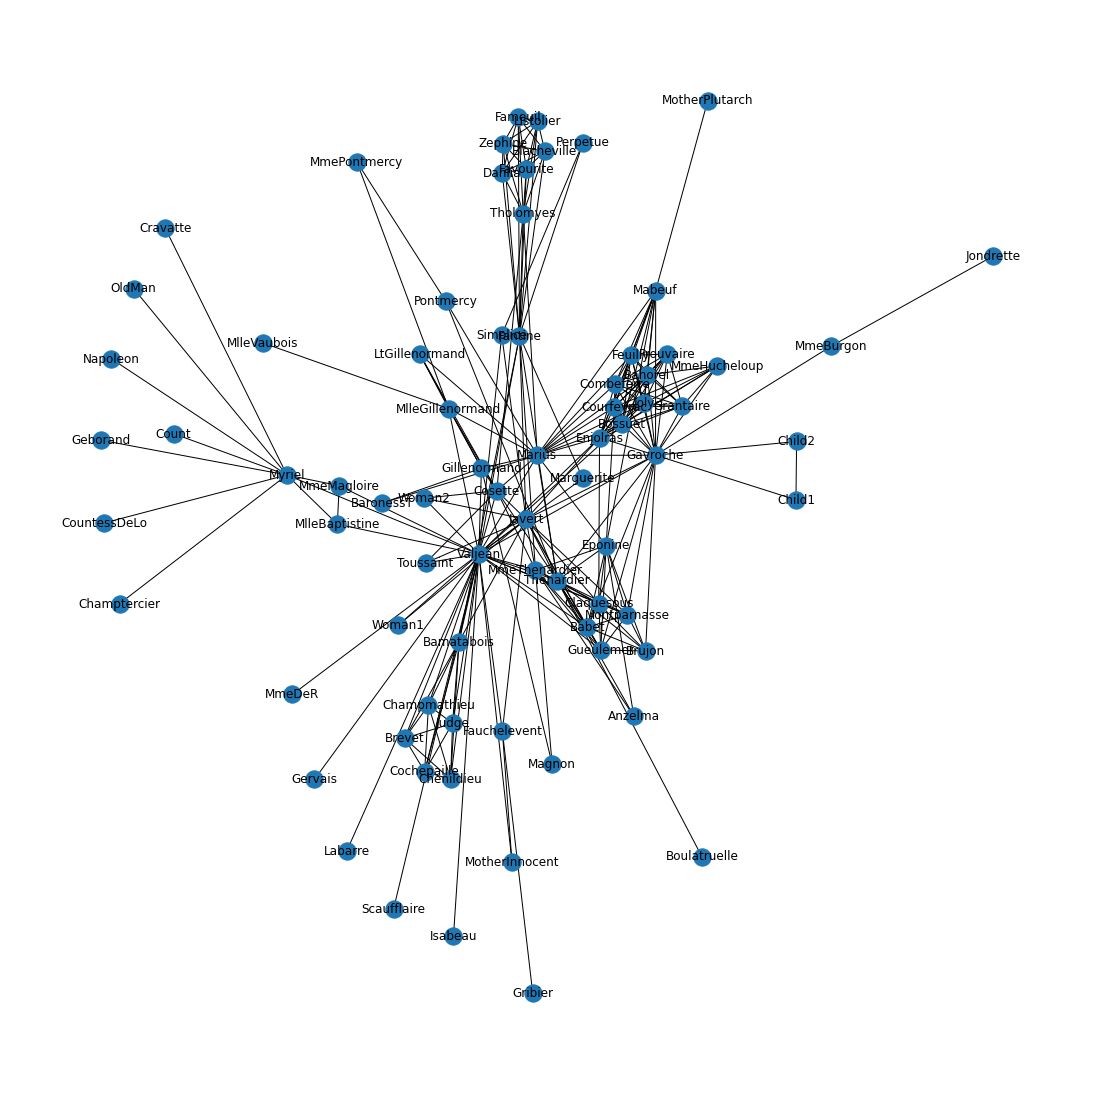

In [6]:
# 可视化
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, seed=5)
nx.draw(G, pos, with_labels=True)
plt.show()

## 构建 Node2vec 模型

In [7]:
# 构建 node2vec 模型
from node2vec import Node2Vec

In [8]:
pip uninstall gensim && pip install gensim==3.8.3

Found existing installation: gensim 3.8.3
Uninstalling gensim-3.8.3:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/gensim-3.8.3.dist-info/*
    /usr/local/lib/python3.9/dist-packages/gensim/*
Proceed (Y/n)? y
  Successfully uninstalled gensim-3.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-3.8.3-cp39-cp39-linux_x86_64.whl


In [9]:
# 设置 node2vec 参数
node2vec = Node2Vec(G, 
                    dimensions=32, # 嵌入维度
                    p=2, # 回家参数
                    q=0.5, # 外出参数
                    walk_length=3, # 随机游走最大长度
                    num_walks=600, # 每个节点作为起始节点生成的随机游走个数
                    workers=4) # 并行线程数

# p=1, q=0.5, n_clusers=6 # DFS 深度优先搜索，挖掘同质社群
# p=1, q=2, n_clusters=3  # BFS 广度优先搜索，挖掘节点的结构功能

model = node2vec.fit(window=3, # skip-gram 窗口大小
                     min_count=1, # 忽略出现次数低于此阈值的节点（词）
                     batch_words=4) # 每个线程处理的数据量
X = model.wv.vectors

Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]

In [10]:
X.shape

(77, 32)

## 节点Embedding 聚类可视化

In [12]:
# Kmeans
from sklearn.cluster import KMeans
import numpy as np
cluster_labels = KMeans(n_clusters=3).fit(X).labels_
print(cluster_labels)

[1 2 1 1 0 1 1 0 1 0 2 1 1 1 0 0 2 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 1 1 0 1 0 0 0 1 1 2 1 0 1 1 1 0 1 1 2 2 2 0 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 节点 Embedding 降维可视化

In [19]:
# 将embedding 用PCA降维到2维
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
embed_2d = pca.fit_transform(X)

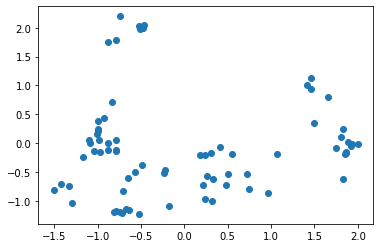

In [20]:
plt.scatter(embed_2d[:,0],embed_2d[:,1])
plt.show()

## 查看embedding

In [21]:
model.wv.get_vector('Napoleon').shape

(32,)

In [22]:
# 查看某个节点的 embedding
model.wv.get_vector('Napoleon')

array([-0.00870998, -1.0276295 ,  0.40802163, -0.41130888,  0.4024458 ,
        0.7202082 ,  0.67852867,  0.00454312,  0.37212908,  0.7623632 ,
       -0.16131908, -0.07091669, -0.706778  , -0.44195142,  0.0290116 ,
       -0.00428708,  0.4066589 ,  0.45819384,  0.11398454,  0.77086586,
        0.7118104 , -0.09625571,  0.878996  ,  1.200965  ,  0.70586884,
        0.14532626, -0.36518666,  0.69037783, -0.7291992 ,  0.19474252,
        0.1255663 , -0.3157765 ], dtype=float32)

In [23]:
# 查找跟 Napoleon 节点相似的节点
model.wv.most_similar('Napoleon')

[('Cravatte', 0.9996213912963867),
 ('CountessDeLo', 0.9991756081581116),
 ('Geborand', 0.9991180896759033),
 ('Champtercier', 0.9990479350090027),
 ('Count', 0.99888014793396),
 ('OldMan', 0.9988036155700684),
 ('MmeMagloire', 0.9794325828552246),
 ('MlleBaptistine', 0.9746205806732178),
 ('Myriel', 0.8622873425483704),
 ('MmeDeR', 0.4949563443660736)]

In [24]:
model.wv.similar_by_word('Napoleon')

[('Cravatte', 0.9996213912963867),
 ('CountessDeLo', 0.9991756081581116),
 ('Geborand', 0.9991180896759033),
 ('Champtercier', 0.9990479350090027),
 ('Count', 0.99888014793396),
 ('OldMan', 0.9988036155700684),
 ('MmeMagloire', 0.9794325828552246),
 ('MlleBaptistine', 0.9746205806732178),
 ('Myriel', 0.8622873425483704),
 ('MmeDeR', 0.4949563443660736)]

In [25]:
# 任意两个节点的相似度
model.wv.similarity('Napoleon', 'Napoleon')

1.0

In [27]:
model.wv.similarity('Napoleon','Brujon')

0.33155325

## 对 edge 做 embedding 


In [28]:
from node2vec.edges import HadamardEmbedder

In [29]:
from networkx.utils.misc import edges_equal
# Hadamard 二元操作符: 两个 embedding 对应元素相乘
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [31]:
# 查看1号节点和2号节点之间的embedding
edges_embs[('Napoleon', 'MlleBaptistine')]

array([ 1.6284380e-04,  9.9957240e-01,  1.3941374e-01,  1.4216129e-01,
        1.3972285e-01,  6.0281324e-01,  4.5746943e-01,  3.4256902e-04,
        1.4425637e-01,  4.8797274e-01, -2.8102743e-02, -3.7492206e-03,
        5.6542945e-01,  1.6186686e-01,  5.3337676e-04, -4.1502385e-04,
        1.5377197e-01,  1.7892309e-01, -1.1254279e-02,  4.4956642e-01,
        4.0456751e-01,  2.4707473e-03,  7.1191776e-01,  1.4623677e+00,
        3.9878994e-01,  2.5578564e-02,  1.4672287e-01,  3.4000754e-01,
        3.5569540e-01,  4.4807471e-02, -4.9605966e-03,  1.5349102e-01],
      dtype=float32)

In [33]:
# 计算所有edge 的embedding
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 3003/3003.0 [00:00<00:00, 64871.73it/s]


In [35]:
# 查看 关系与1号节点-2号节点 最相似的节点对
edges_kv.most_similar(str(('Bossuet','Valjean')))

[("('Joly', 'Valjean')", 0.9898680448532104),
 ("('Combeferre', 'Valjean')", 0.9844027757644653),
 ("('Feuilly', 'Valjean')", 0.9834139347076416),
 ("('Courfeyrac', 'Valjean')", 0.9813487529754639),
 ("('Prouvaire', 'Valjean')", 0.9768447279930115),
 ("('Grantaire', 'Valjean')", 0.9664102792739868),
 ("('MmeHucheloup', 'Valjean')", 0.9542120695114136),
 ("('Bahorel', 'Valjean')", 0.9429470300674438),
 ("('Enjolras', 'Valjean')", 0.8882195949554443),
 ("('Mabeuf', 'Valjean')", 0.7823408842086792)]